In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

250.29821754375283 52.15723774658944
119.70541980659142 35.729339678793885
105.06505494432322 33.774214977218854
17.96603149976314 14.071563923555235
117.80591142707082 36.50091190529
256.1864589585834 54.3318415316416
103.5765868847539 34.4702511881275
17.947452356536914 15.08791162147393


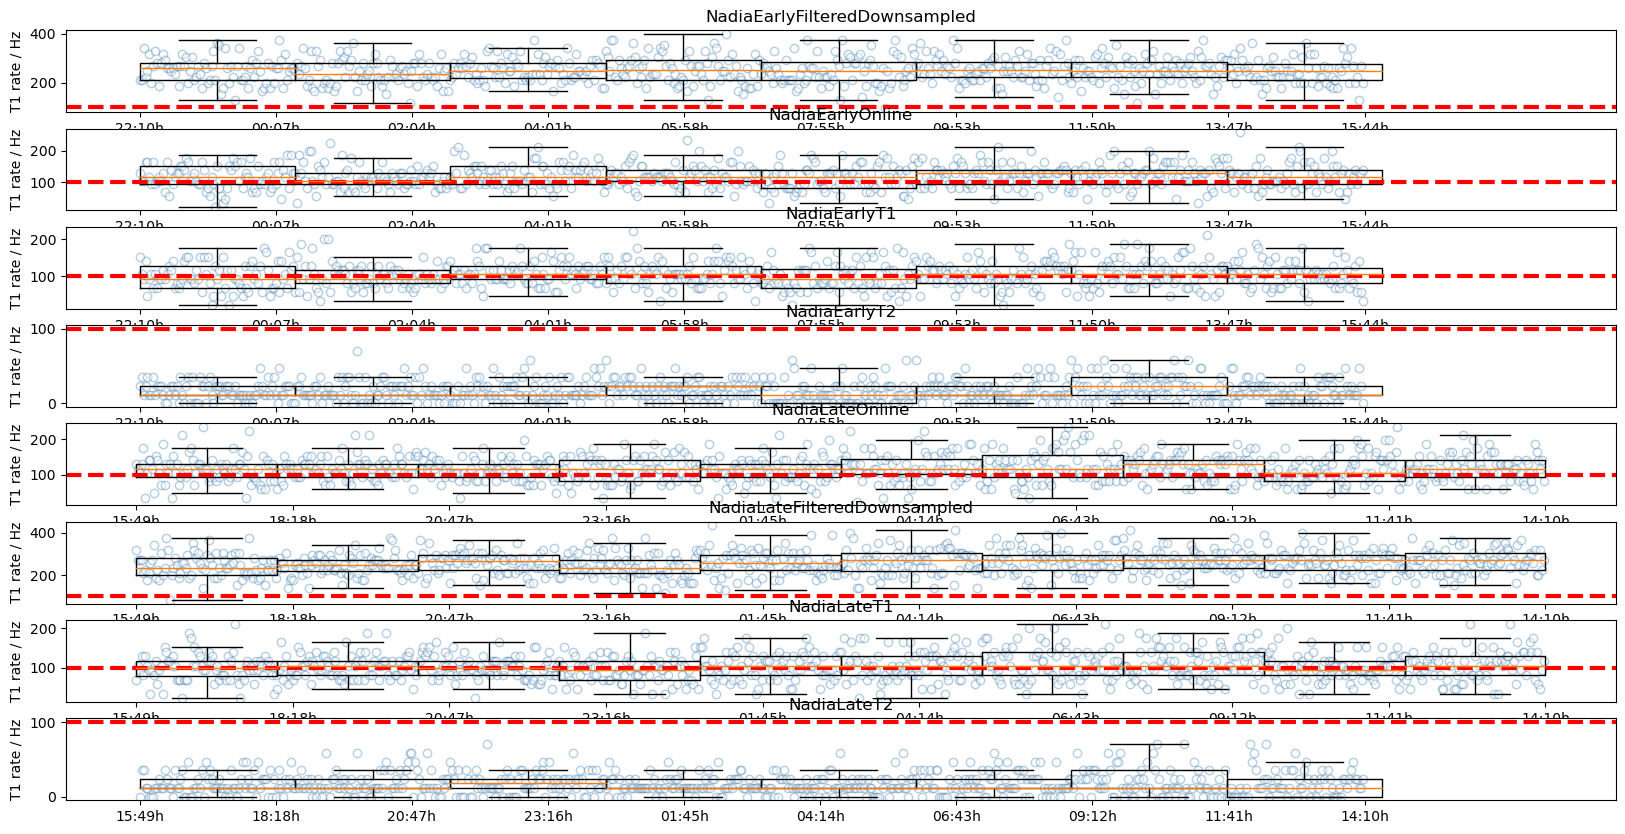

In [13]:
plt.rcParams['figure.figsize'] = [20,10]
fig, axes = plt.subplots(8, 1)


for ax, station in zip(axes, ['NadiaEarlyFilteredDownsampled', 'NadiaEarlyOnline', 'NadiaEarlyT1', 'NadiaEarlyT2', 'NadiaLateOnline', 'NadiaLateFilteredDownsampled', 'NadiaLateT1', 'NadiaLateT2']):
    violins = []

    root_path = f'/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Mar2023/{station}/'
    for file in os.listdir(root_path):
        data = np.loadtxt(root_path + file)
        violins.append(sum(data) / (8.33e-9 * 2048 * len(data)))

    ax.scatter(range(len(violins)), violins, facecolor = 'white', edgecolors = "steelblue", alpha = 0.4)

    print(np.mean(violins), np.std(violins))
    
    combine = 80
    indices = np.arange(0, 799, combine)
    violins = np.split(np.array(violins), indices)
    positions = [combine] + [int(i + 0.5*combine) for i in indices]

    ax.boxplot(violins, positions = positions, widths = combine, showfliers = False)
    ax.axhline(100, c = "r", ls = "--", lw = 3)
    #_ = plt.violinplot(violins, range(50, 849, 100), vert = True, showmeans = True)
    ax.set_title(station)

    # timing information
    timestamps = np.loadtxt(f'/cr/tempdata01/filip/UubRandoms/Mar2023/converted/timestamps/{station}.dat', dtype=str)
    start = int(timestamps[np.where(timestamps[:, 0] == "randoms0000.dat")[0][0]][1])
    stop = int(timestamps[np.where(timestamps[:, 0] == f"randoms0{'800' if 'Late' in station else '631'}.dat")[0][0]][1])
    xticks = np.linspace(start, stop, 10)

    ax.set_ylabel('T1 rate / Hz')
    ax.set_xticks(np.linspace(0, len(os.listdir(root_path)), 10), [datetime.datetime.fromtimestamp(x).strftime("%H:%Mh") for x in xticks])

In [30]:
flat_violins = [l for p in violins for l in p]
files = os.listdir('/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Nov2022/SvenjaT1/')
print(files[0], (np.array(flat_violins) * (8.33e-9 * 2048 * 5000))[1])

randoms0009_WCD.dat 18.0
